### Reading an image

In [1]:
from skimage import io # Utilities to read and write images in various formats.

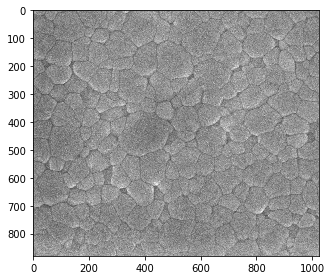

In [3]:
img = io.imread("grains_crop.png")
io.imshow("grains_crop.png")
io.show()

### Writing / saving an image

In [4]:
from skimage import io
img = io.imread("grains_crop.png")
io.imsave("grains_crop.png", img)

### Data module
> This module provides some standard test images which one can work on like a grayscale camera image, grayscale text image, coffee cup, etc.

In [5]:
from skimage import data

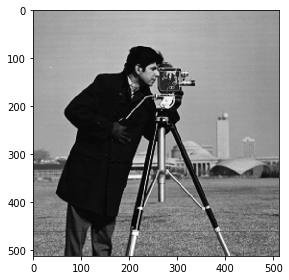

In [6]:
io.imshow(data.camera())
io.show()

In [7]:
data.camera().shape

(512, 512)

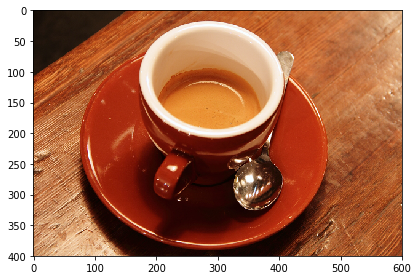

In [8]:
io.imshow(data.coffee())
io.show()

### Color module
> This module of the library contains functions for converting the image from one color space to another.

- **Convert RGB to gray**: The `rgb2gray()` function in the module can be used to convert a RGB image to a grayscale image. It takes the RGB image array as input and returns the grayscale image array.

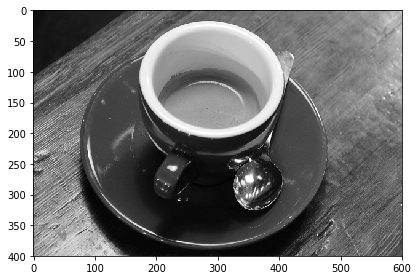

In [115]:
from skimage import io, color
img = data.coffee()
gray = color.rgb2gray(img)
io.imshow(gray)
io.show()

In [116]:
gray.shape # 2-dimensional

(400, 600)

- **Convert RGB to HSV**: The `rgb2hsv()` function in the module can be used to convert an RGB image to an HSV image. It takes the RGB image array as input and returns the HSV image array.

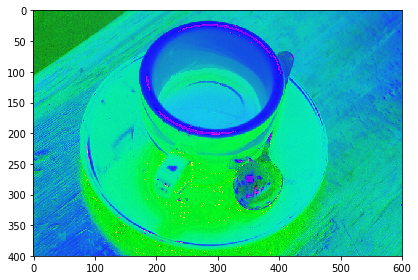

In [113]:
img = data.coffee()
img_hsv = color.rgb2hsv(img)
io.imshow(img_hsv)
io.show()

In [117]:
img_hsv.shape # still 3-dimensional

(400, 600, 3)

### Draw module
> The draw module has various functions to draw different shapes such as circles, ellipses, and polygons.

- **Circles**: To draw a circle on an image, skimage provides a `circle()` function. It takes the center coordinates and the radius as input and returns all the pixel coordinates, which lie within the circle of the given coordinates and radius. After getting the pixels within the circle, assign them the value 1 in the 2D matrix and all the other points make it 0.

In [16]:
import numpy as np
from skimage import io, draw

/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


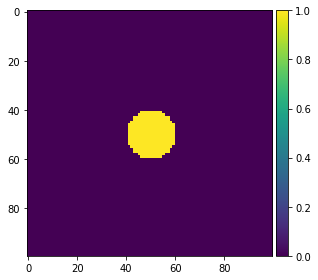

In [31]:
img = np.zeros((100, 100), dtype=np.uint8)# generating a blank canvas essentially
x, y = draw.circle(50, 50, 10)            # a circle at coordinates 50,50 with radius 10
img[x,y] = 1                              # assigning anything xy 1 all else 0
io.imshow(img)
io.show()

- **Ellipses**: To draw an ellipse on an image, skimage provides an `ellipse()` function. This function of the draw module can be used to get the coordinates of the pixels within the ellipse of given parameters. Then, these pixels can be distinguished from others by increasing the pixel value:

/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


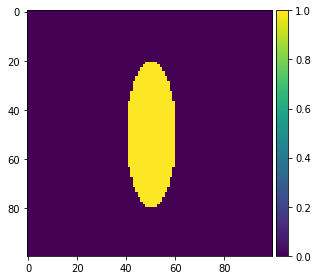

In [32]:
img = np.zeros((100, 100), dtype=np.uint8) # canvas
x, y = draw.ellipse(50, 50, 30, 10)        # ellipse with specific shape vert30, horz10
img[x, y] = 1
io.imshow(img)
io.show()

- Polygons: The `polygon()` function takes the array of x and y coordinates of the vertices and returns the pixel coordinates which lie within the polygon:

/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


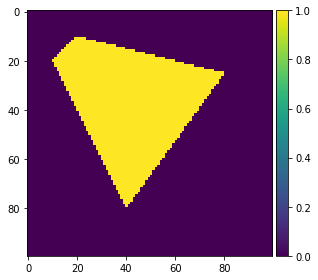

In [33]:
img = np.zeros((100, 100), dtype=np.uint8)
r = np.array([10, 25, 80, 20])
c = np.array([20, 80, 40, 10])
x, y = draw.polygon(r,c)
img[x, y] = 1
io.imshow(img)
io.show()

## Image Derivatives
    > See real life notebook for notes

## Convolution
> - the sum of the product of corresponding elements of a kernel matrix to an image matrix

## Image filters
> - enahncing an image by applying some function on the pixel values
- types of filtering include:
    - Gaussian blur
    - Median filter
    - Dilation and erosion
    - Custom filters
    - Image thresholding

### Gaussian
- when we create a kernel that follows a Gaussian distribution, the center pixel gets the most weight and its neighboring pixels get lesser weight when performing convolution
- the pixel which has to be modified will have the highest weight in the kernel and the weight decreases for the pixels which are far away

In [36]:
from skimage import io
from skimage import filters

/anaconda3/lib/python3.6/site-packages/skimage/filters/_gaussian.py:108: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  warn(RuntimeWarning(msg))


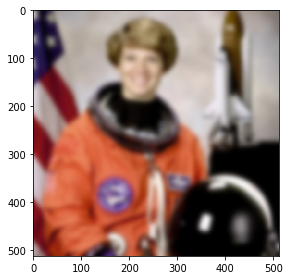

In [37]:
img = data.astronaut()
out = filters.gaussian(img, sigma=5) #takes in the img and desired blur
io.imshow(out)
io.show()

### Median filter
- returns the median value from the pixel and its neighbors
- seems pointless

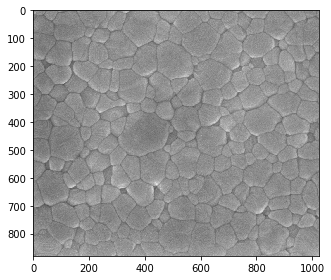

In [41]:
img = io.imread('grains_crop.png')
out = filters.median(img)
io.imshow(out)
io.show()

### Morphological operations
- a collection of non-linear operations related to the shape or morphology of features in an image such as boundaries, skeletons, etc.
- probe an image with a small shape or template called a structuring element, which defines the RoI or neighborhood around a pixel
- use inherent structure or features of an image and processes the image while maintaining the overall structure
- most common are erosion and dilation

**// Note that morphology functions only work on gray-scale or binary images, so we set `as_grey=True`. //**

/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


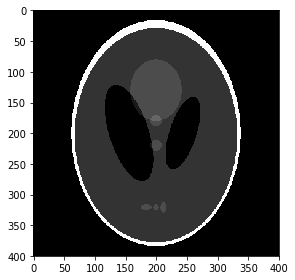

In [76]:
import os
import matplotlib.pyplot as plt
from skimage.data import data_dir
from skimage.util import img_as_ubyte
from skimage import io

%matplotlib inline   ##### ADD THIS TO OPEN SOURCE #####

orig_phantom = img_as_ubyte(io.imread(os.path.join(data_dir, "phantom.png"),
                                      as_grey=True))
fig, ax = plt.subplots()
io.imshow(orig_phantom, cmap=plt.cm.gray)
io.show()

- Convenience function for plotting comparisons:

In [77]:
def plot_comparison(original, filtered, filter_name):
    
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (8,4), sharex=True, sharey=True)
    
    ax1.imshow(original, cmap = plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

### Erosion
Morphological `erosion` sets a pixel at (i, j) to the minimum over all pixels in the neighborhood centered at (i, j). The structuring element, `selem`, passed to `erosion` is a boolean array that describes this neighborhood. Below, we use `disk` to create a circular structuring element, which we use for most of the following examples.
> - Removing parts of an image
- Makes the objects in an image shrink while maintaining the overall structure and shape of the image
- Used for objects that are really close by
- Also used for removing noise from the image in some cases

Skimage provides a `binary_erosion()` function for erosion in its morphology module. This function sets the value of the pixel to the min value of its neighboring pixels.

In [70]:
from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import black_tophat, skeletonize, convex_hull_image
from skimage.morphology import disk

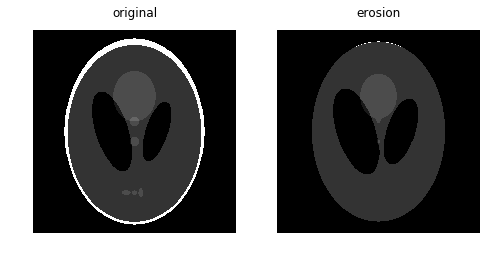

In [81]:
selem = disk(6) # Play with size of disk to erode more or less
eroded = erosion(orig_phantom, selem)
plot_comparison(orig_phantom, eroded, 'erosion')

### Dilation
Morphological `dilation` sets a pixel at (i, j) to the _maximum over all pixels in the neighborhood centered at (i, j)_. Dilation enlarges bright regions and shrinks dark regions.
> - the opposite of erosion
- expanding parts of the image
- useful in situations where we want to magnify small details
- also for filling up unwanted gaps/holes

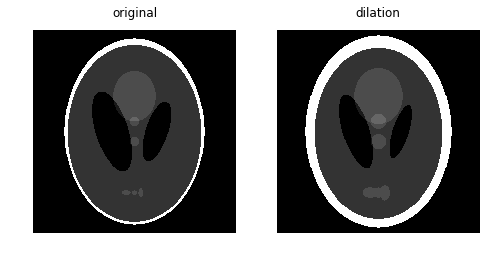

In [87]:
selem = disk(6)
dilated = dilation(orig_phantom, selem)
plot_comparison(orig_phantom, dilated, 'dilation')

### Opening
Morphological `opening` on an image is defined as _an erosion followed by a dilation_. Opening can remove small bright spots (i.e. “salt”) and connect small dark cracks.

> - Since `opening` an image starts with an erosion operation, light regions that are smaller than the structuring element are removed. The dilation operation that follows ensures that light regions that are larger than the structuring element retain their original size. 
- Notice how the light and dark shapes in the center their original thickness but the 3 lighter patches in the bottom get completely eroded. The size dependence is highlighted by the outer white ring: The parts of the ring thinner than the structuring element were completely erased, while the thicker region at the top retains its original thickness.

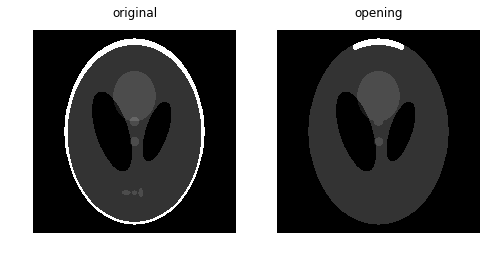

In [93]:
selem = disk(6)
opened = opening(orig_phantom, selem)
plot_comparison(orig_phantom, opened, 'opening')

### Closing
Morphological `closing` on an image is defined as _a dilation followed by an erosion_. Closing can remove small dark spots (i.e. “pepper”) and connect small bright cracks.

To illustrate this more clearly, we'll add a small crack to the white border below...

- Since `closing` an image starts with an dilation operation, dark regions that are _smaller_ than the structuring element are removed. The dilation operation that follows ensures that dark regions that are larger than the structuring element retain their original size.
- Notice how the white ellipses at the bottom get connected because of dilation, but other dark region retain their original sizes. Also notice how the crack we added is mostly removed.

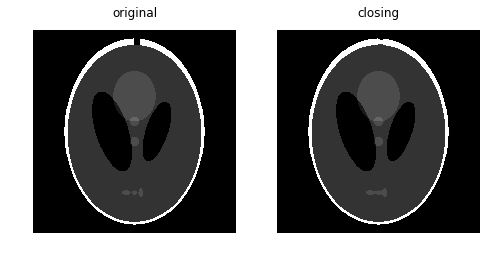

In [97]:
phantom = orig_phantom.copy()
phantom[10:30, 200:210] = 0

selem = disk(6)
closed = closing(phantom, selem)
plot_comparison(phantom, closed, 'closing')

### White tophat
The `white_tophat` of an image is defined as the _image minus its morphological opening_. This operation returns the bright spots of the image that are smaller than the structuring element.

To make things interesting, we’ll add bright and dark spots to the image below...

- As you can see, the 10-pixel wide white square is highlighted since it is smaller than the structuring element. Also, the thin, white edges around most of the ellipse are retained because they’re smaller than the structuring element, but the thicker region at the top disappears.

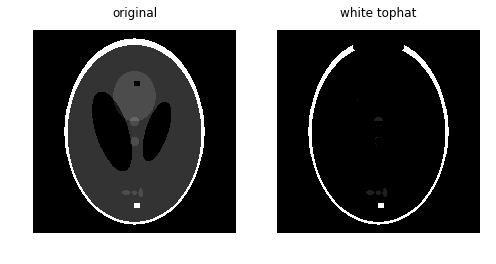

In [102]:
phantom = orig_phantom.copy()
phantom[340:350, 200:210] = 255
phantom[100:110, 200:210] = 0

selem = disk(6)
w_tophat = white_tophat(phantom, selem)
plot_comparison(phantom, w_tophat, 'white tophat')

### Black tophat
The `black_tophat` of an image is defined as its morphological **closing minus the original image**. This operation returns the _dark spots of the image that are smaller than the structuring element._
- As you can see, the 10-pixel wide black square is highlighted since it is smaller than the structuring element.

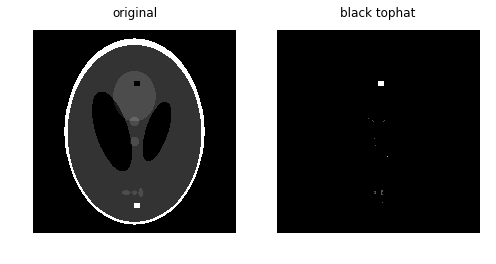

In [107]:
selem = disk(6)
b_tophat = black_tophat(phantom, selem)
plot_comparison(phantom, b_tophat, 'black tophat')

## Duality

As you should have noticed, many of these operations are simply the reverse of another operation. This duality can be summarized as follows:

> 1. Erosion <-> Dilation
2. Opening <-> Closing
3. White tophat <-> Black tophat

### Skeletonize
Thinning is used to reduce each connected component in a binary image to a _single-pixel wide skeleton._ It is important to note that this is performed on binary images only.
- As the name suggests, this technique is used to thin the image to 1-pixel wide skeleton by applying thinning successively.

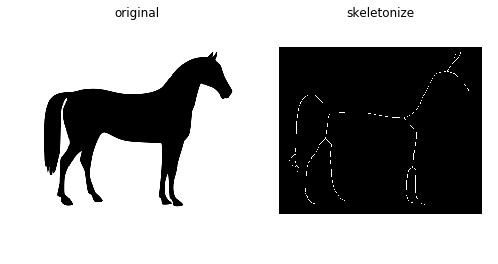

In [110]:
horse = io.imread(os.path.join(data_dir, "horse.png"), as_grey=True)

sk = skeletonize(horse == 0)
plot_comparison(horse, sk, 'skeletonize')

### Convex hull
The `convex_hull_image` is the _set of pixels included in the smallest convex polygon that surround all white pixels in the input image_. Again note that this is also performed on binary images.

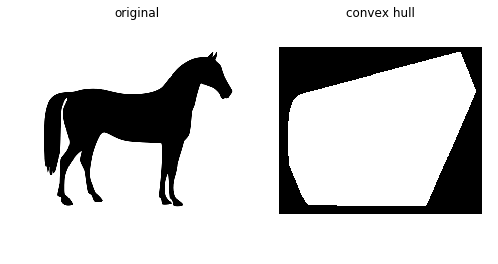

In [111]:
hull1 = convex_hull_image(horse == 0)
plot_comparison(horse, hull1, 'convex hull')

As the figure illustrates, `convex_hull_image` gives the smallest polygon which covers the white or True completely in the image.

If we add a small grain to the image, we can see how the convex hull adapts to enclose that grain:

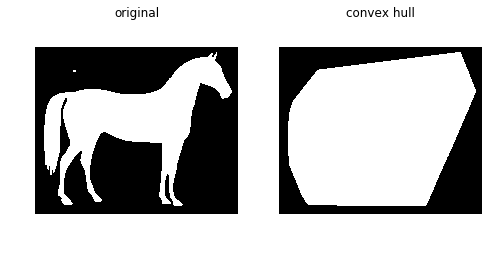

In [112]:
import numpy as np

horse_mask = horse == 0
horse_mask[45:50, 75:80] = 1

hull2 = convex_hull_image(horse_mask)
plot_comparison(horse_mask, hull2, 'convex hull')